# Test of YOLO inference and data preprocessing
## Imports

In [37]:
from matplotlib.pyplot import imshow
import os
import cv2
import random
import numpy as np
from datetime import datetime
from CellDetector import CellDetector
import matplotlib.pyplot as plt
%matplotlib inline

## Load model

In [38]:
cell_detector = CellDetector("02_23_all_data_ft.pt")

## Load data

In [39]:
DEATH_TYPE = "Necroptosis"
base_dir = "/Users/sapplab/Desktop/CellDataProcessing/MEF1/"
images_dir = base_dir + "TSV_phase/"
green_dir = base_dir + "TSV_green/"
results_dir = "/Users/sapplab/Desktop/CellDataProcessing/MEF1/"
images = os.listdir(images_dir)
len_images = len(images)

In [40]:
image_id = random.randrange(len_images)
print(image_id)
source = images_dir + images[image_id]
source_green = green_dir + images[image_id]
print(source)

187
/Users/sapplab/Desktop/CellDataProcessing/MEF1/TSV_phase/VID746_C6_1_00d22h00m.png


In [41]:
img = cv2.imread(source, cv2.IMREAD_UNCHANGED)

img_green = cv2.imread(source_green, cv2.IMREAD_UNCHANGED)
img_green = cv2.convertScaleAbs(img_green, alpha=(255.0/65535.0))
img_green = cv2.addWeighted(img_green, 1.7, np.zeros(img_green.shape, img_green.dtype), 0, 0.0)

## Predict

In [42]:
results = cell_detector.predict_with_crop(img, 0.2, 0.4)
print(np.shape(results))


0: 128x128 (no detections), 36.2ms
Speed: 0.3ms preprocess, 36.2ms inference, 0.2ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 1 necroptosis, 34.7ms
Speed: 0.3ms preprocess, 34.7ms inference, 0.4ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 34.8ms
Speed: 0.3ms preprocess, 34.8ms inference, 0.2ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 34.7ms
Speed: 0.4ms preprocess, 34.7ms inference, 0.2ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 34.5ms
Speed: 0.3ms preprocess, 34.5ms inference, 0.2ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 33.9ms
Speed: 0.3ms preprocess, 33.9ms inference, 0.2ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 1 necroptosis, 34.4ms
Speed: 0.3ms preprocess, 34.4ms inference, 0.3ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 34.5ms
Speed: 0.3ms preprocess, 34.5ms infer

## Visualize

In [43]:
IF_GREEN = True

if IF_GREEN:
    image_boxed, image_green_boxed = cell_detector.box_image(img, results, image_green = img_green)
else:
    image_boxed = cell_detector.box_image(img, results)

Text(0.5, 1.0, 'Green')

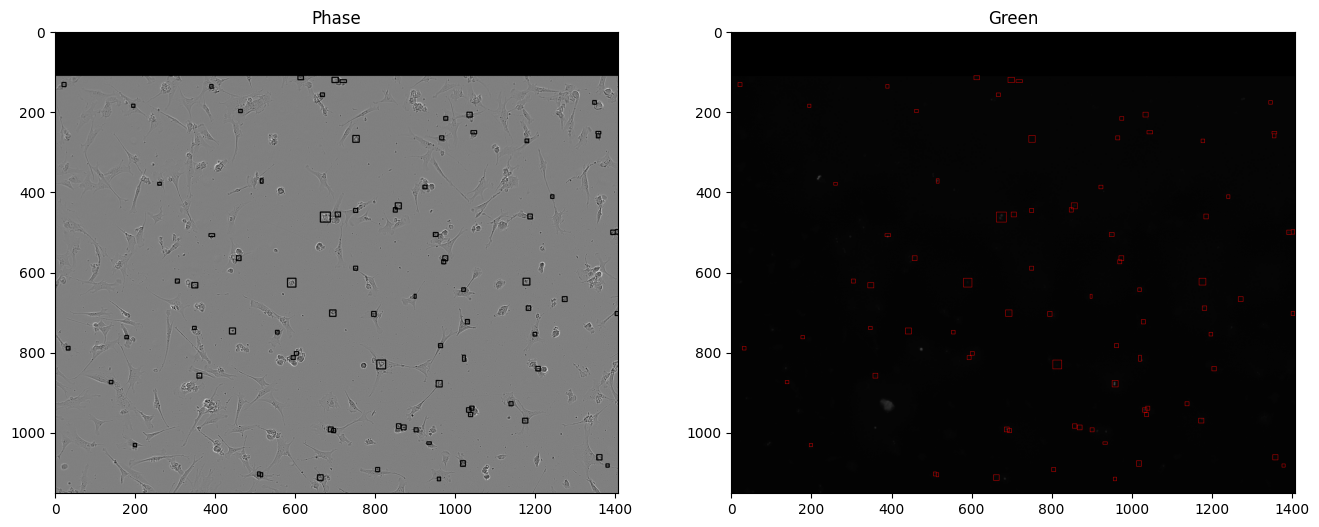

In [44]:
fig, ((ax1),(ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(16,8))

image_boxed = cv2.cvtColor(image_boxed, cv2.COLOR_BGR2RGB)

image_green_boxed = cv2.cvtColor(image_green_boxed, cv2.COLOR_BGR2RGB)


ax1.imshow(image_boxed)
ax1.set_title("Phase")

ax2.imshow(image_green_boxed)
ax2.set_title("Green")

In [45]:
tm = datetime.today().strftime('%Y_%m_%d-%H_%M_%S')
img_name = "/Users/sapplab/Desktop/CellDataProcessing/test_images/example_results_big/" + DEATH_TYPE + "_" + images[image_id] + tm + ".png"
#cv2.imwrite(img_name,full_img)
fig.savefig(img_name)